# Project: Wrangling and Analyze Data

## Table of Content

1. Imports 
2. Data Gathering
3. Data Assessment
4. Data Cleaning
5. Storing Data 
6. Analyzing and Visualizing Data
7. Insights

## Imports <a id="imports"></a> 

In [1]:
import requests
import tweepy
import pandas as pd
import numpy as np
import json
import os
from more_itertools import chunked
import glob
import re
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### Downloading the WeRateDogs Twitter archive data ###

In [2]:

archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
archive_enhanced


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

### Downloading the tweet image prediction data ###

In [3]:
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_prediction_url, 'lxml')

with open("image-predictions.tsv", mode = 'wb') as file:
          file.write(response.content)   

In [4]:
# Reading the image-predictions data into dataframe

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Reading in my twitter developer keys through a txt file ###

In [5]:
keys = {}
try:
    with open('Keys.txt') as file:
        for line in file.readlines():
            key = line.rstrip().split(',')
            keys[key[0]] = key[1]
except:
    pass
        
keys.keys()

dict_keys(['Key', 'Secret', 'Token', 'Access_Token', 'Access_Secret'])

In [6]:
consumer_key = keys['Key']
consumer_secret = keys['Secret']
access_token = keys['Access_Token']
access_secret = keys['Access_Secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


### Querying the Twitter API and saving the responses into .json files ###

In [7]:
dataset_length = len(archive_enhanced)
folder = 'twitter_data'

try:

    os.makedirs(folder)

    for batch in chunked(range(dataset_length), 100):
        tweet_ids = list(archive_enhanced.tweet_id[batch])
        batch_lookup = api.lookup_statuses(tweet_ids)

        for tweet in batch_lookup:
            with open(os.path.join(folder, tweet.id_str+'.json'), 'w') as file:
                file.write(json.dumps(tweet._json))
                
except:
    pass



### Loading the saved .json files, extracting the tweet's id, number of likes and retweets, and saving it all in a single text file ###


In [8]:
# Creating the txt file if it has not already been created in a previous session

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as txt_file:

        for tweet_file in glob.glob(folder + '/*.json' ):
            with open(tweet_file) as file:
                tweet_data = json.load(file)
                tweet_id = int(tweet_data['id'])
                tweet_retweet_count = int(tweet_data['retweet_count'])
                tweet_fav_count = int(tweet_data['favorite_count'])
                txt_file.write(f'{tweet_id} {tweet_retweet_count} {tweet_fav_count}\n')


### Converting the text file to a pandas dataframe ###

In [9]:
data_list = []

with open('tweet_json.txt') as txt_file:
    for line in txt_file.readlines():
        data = line.split(' ')
        data = [int(x) for x in data]
        data_list.append(data)
        
tweet_json = pd.DataFrame(data_list, columns = ['tweet_id', 'retweet_count', 'fav_count'])
tweet_json.head(5)

,tweet_id,retweet_count,fav_count
0,750011400160841729,819,2994
1,671561002136281088,6291,11346
2,695816827381944320,1050,2750
3,763183847194451968,1348,5043
4,672538107540070400,315,898


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Data Assessment ##

### Visual Assessment ###

#### 1. archive_enhanced table ####

In [10]:
#assessing visually 

archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
archive_enhanced.sample(20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None
310,835309094223372289,NaN,NaN,2017-02-25 02:03:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: So this just changed my life. 1...,7.530398e+17,4.196984e+09,2016-07-13 01:34:21 +0000,"https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...",13,10,None,None,None,None,None
1321,706310011488698368,NaN,NaN,2016-03-06 02:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Thinks it's an ai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706310011...,12,10,None,None,None,pupper,None
706,785533386513321988,NaN,NaN,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785533386...,11,10,Dallas,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


#### Issues Noted ####

#### Quality Issues #### 


<li> missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. </li>
<li> inconsistent data entry as name column have entries both in upper case and lower case. </li>
<li> source column has HTML tags present. </li>
<li> expanded_url column contains both twiiter and non- twitter links e.g https://www.petfinder.com/petdetail/34918210,h...	
</li>

#### Tidiness Issues ####
<li> doggo, floofer, pupper, puppo variables all represent values of a single column, dog_stage. </li>

#### 2. image_predictions table ####

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
image_predictions.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True
1659,811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True


#### Issues Noted ####

#### Quality Issues ####

<li> Inconsistent data entry format as p1, p2 and p3 have entries both in uppercase and lowercase. </li>

#### 3. tweet_json table ####

In [14]:
tweet_json

,tweet_id,retweet_count,fav_count
0,750011400160841729,819,2994
1,671561002136281088,6291,11346
2,695816827381944320,1050,2750
3,763183847194451968,1348,5043
4,672538107540070400,315,898
5,700505138482569216,520,2099
6,750071704093859840,3016,7223
7,835574547218894849,3287,16593
8,674754018082705410,382,1226
9,675798442703122432,3037,9290


#### Issues Noted ####

#### Tidiness Issues ####

<li> tweet_json table should be joined to the archive_enhanced table. </li>

### Programmatic Assessment ###

#### 1. archive_enhanced table ####

In [15]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
archive_enhanced.duplicated().sum()

0

In [17]:
archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Issues Noted ####

#### Quality Issues ####

<li> Erroneous datatype for timestamp and retweeted_timestamp(should be datetime). </li>
<li> Erroneous datatype for tweet_id(should be string). </li>

#### 2. image_predictions table ####

In [18]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.duplicated().sum()

0

#### Issues Noted ####

#### Quality Issues ####

<li> missing number of records (2075 instead of 2356 just like the archive_enhanced table). </li>
<li> wrong datatype for tweet_id (should be string). </li>

#### 3. tweet_json table ####

In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id         2327 non-null int64
retweet_count    2327 non-null int64
fav_count        2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


#### Issues Noted ####

#### Quality Issues ####

<li> Erroneous datatype for tweet_id (should be string). </li>
<li> Missing or incomplete data: number of retrieved tweets less than number of tweet ids in archive_enhanced. </li>

## Collated issues

### Quality Issues

#### archive_enhanced table



<li> Missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.</li>
<li> Inconsistent data entry as name column have entries both in upper case and lower case.</li> 
<li> Source column has HTML tags present.</li>
<li> The expanded_url column contains both twiiter and non- twitter links e.g https://www.petfinder.com/petdetail/34918210,h...</li>
<li> Erroneous datatype for timestamp and retweeted_timestamp(should be datetime).</li>
<li> Erroneous datatype for tweet_id in the archive_enhanced, image_predictions and tweet_json tables(should be string).</li>

#### image_predictions table

<li> Inconsistent data entry format as p1, p2 and p3 have entries both in uppercase and lowercase.<?li>
<li> Missing number of records between the image_predictions and the archive_enhanced table).</li>

#### tweet_json table

<li> Missing number of records (number of retrieved tweets is less than number of tweet ids in archive_enhanced).</li>

### Tidiness issues

#### archive_enhanced table 

<li> doggo, floofer, pupper, puppo variables all represent values of a single column, dog_stage.</li>


#### tweet_json table


<li> tweet_json table should be joined to the archive_enhanced table.</li>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
archive_enhanced_clean = archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Cleaning Quality Issues

### 1. archive_enhanced table

### Issue 0: Some of the tweets in the archive_enhanced dataframe are not original tweets, but retweets of other tweets

From the project's specifications, we only want original ratings (no retweets) that have images.
In solving this issue, I will be ensuring that only original tweets remain in the dataframe. Making sure these tweets have images will be solved under a later issue.

In [23]:
archive_enhanced_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None
846,766313316352462849,NaN,NaN,2016-08-18 16:38:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He has legendary eyebrows and h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766313316...,12,10,Oscar,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","For anyone who's wondering, this is what happe...",NaN,NaN,NaN,https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo,None,None,None
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,None,None,None,None
362,829449946868879360,NaN,NaN,2017-02-08 22:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829449946...,11,10,None,doggo,None,None,None
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None


#### Define:

Drop records that have a non-NAN value for retweeted_status_id

#### Code

In [24]:
archive_enhanced_clean = archive_enhanced_clean[archive_enhanced_clean.retweeted_status_id.isnull()]
archive_enhanced_clean.reset_index(drop=True, inplace = True)

#### Test

In [25]:
archive_enhanced_clean.retweeted_status_id.unique()

array([ nan])

### Issue #1:  Missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Define: 
Dropping the above listed columns as they columns that have missing data (number of entries lesser than 2356).

#### Code:


In [26]:
archive_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                              'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [27]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 204.0+ KB


### Issue 1b: Incorrect value, tweet of tweet_id 854010172552949760 dog_stage was wrongly catpured, This is supposed to be floofer, but it is captured as doggo and floofer.

#### Define

Change the value of doggo to an empty cell, np.nan in the column doggo.

#### Code

In [28]:
archive_enhanced_clean.query("tweet_id == '854010172552949760'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
172,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [29]:
archive_enhanced_clean.query("tweet_id == '854010172552949760'")["text"].values

array([ "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"], dtype=object)

In [30]:
archive_enhanced_clean.loc[200] = archive_enhanced_clean.loc[200].replace(to_replace="doggo", value = np.nan)

#### Test

In [31]:
archive_enhanced_clean.loc[200]

tweet_id                                             847617282490613760
timestamp                                     2017-03-31 01:11:22 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  .@breaannanicolee PUPDATE: Cannon has a heart ...
expanded_urls                                                       NaN
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 200, dtype: object

### Issue #2: Inconsistent data entry as name column have entries both in upper case and lower case.

#### Define:
Allow entries to the dog name column to all be in lowercase for consistency.

#### Code

In [32]:
archive_enhanced_clean.name = archive_enhanced_clean.name.str.lower()

#### Test

In [33]:
archive_enhanced_clean.name.sample(50)

1968    chester
776        lola
1861       none
2057       none
1208       kaia
749        none
1234       none
2145      quite
1998       none
1266       none
791         zoe
1589      bella
1862         jd
684       oscar
1368     herald
1238     claude
146        none
1352       none
1357      gizmo
14       stuart
1189          a
1906      mason
691      gromit
283       orion
1600       none
286      smiley
757        milo
1276        bob
75       ginger
1518       none
1908    trigger
71          aja
877        phil
679      rupert
76         none
1916    vincent
935        none
414        toby
1435    petrick
2015    ruffles
1094      penny
1543       ozzy
811     winston
1680     reggie
1230      yukon
312        bear
96        rover
1090      vince
74        nelly
657       dixie
Name: name, dtype: object

### Issue #3: Source column has HTML tags present.

#### Define:
Due to improper formatting, there is presence of html in the entries of the source column. This will be cleaned by using string slicing.

#### Code

In [34]:
archive_enhanced_clean.iloc[1000,2]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [35]:
archive_enhanced_clean["source"] = archive_enhanced_clean["source"].str.strip(). \
apply(lambda x: x[x.index(">") +1 : x.index("</")])

#### Test

In [36]:
archive_enhanced_clean["source"].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4: The expanded_url column contains both twitter and non- twitter links e.g https://www.petfinder.com/petdetail/34918210,h...

#### Define

Replace the non-Twitter urls with the Twitter version by joining the https://twitter.com/dog_rates/status/ to the tweet_id

#### Code

In [37]:
def expanded_url_generator(x:int):
    """
    x: tweet_id in question 
    """
    return 'https://twitter.com/dog_rates/status/' + str(x)

archive_enhanced_clean.expanded_urls = archive_enhanced_clean.tweet_id.apply(expanded_url_generator)

#### Test

In [38]:
for link in archive_enhanced_clean.expanded_urls.sample(10):
    print(link)

https://twitter.com/dog_rates/status/686947101016735744
https://twitter.com/dog_rates/status/668994913074286592
https://twitter.com/dog_rates/status/670783437142401025
https://twitter.com/dog_rates/status/803276597545603072
https://twitter.com/dog_rates/status/737322739594330112
https://twitter.com/dog_rates/status/673680198160809984
https://twitter.com/dog_rates/status/823699002998870016
https://twitter.com/dog_rates/status/670452855871037440
https://twitter.com/dog_rates/status/756651752796094464
https://twitter.com/dog_rates/status/685906723014619143


### Issue #5: Erroneous datatype for timestamp and retweeted_status_timestamp(should be datetime).

#### Define

The datatype for timestamp and retweeted_timestamp should be datetime and not integer. For retweeted_status_timestamp. 
since the column has been dropped as a result of a lot of missing data, the column is no longer available to rectify.

#### Code

In [39]:
archive_enhanced_clean.timestamp = archive_enhanced_clean.timestamp.apply(pd.to_datetime)

#### Test

In [40]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 204.0+ KB


### Issue #6: Erroneous datatype for tweet_id in the archive_enhanced, image_predictions, and tweet_json tables

#### Define

The datatype for tweet_id should be str and not integer.

#### Code

In [41]:
archive_enhanced_clean["tweet_id"] = archive_enhanced_clean["tweet_id"].astype("str")

In [42]:
image_predictions_clean["tweet_id"] = image_predictions_clean["tweet_id"].astype("str")

In [43]:
tweet_json_clean["tweet_id"] = tweet_json_clean["tweet_id"].astype("str")

#### Test

In [44]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 204.0+ KB


In [45]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [46]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id         2327 non-null object
retweet_count    2327 non-null int64
fav_count        2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Issue #7: Inconsistent data entry format as p1, p2 and p3 have entries both in uppercase and lowercase.

#### Define

For consistency, all data entries in the p1,p2,p3 columns will be changed to lowercase.

#### Code

In [47]:
for column in ['p1', 'p2', 'p3']:
    image_predictions_clean[column] = image_predictions_clean[column].apply(lambda x: str(x).lower())

#### Test

In [48]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
317,671744970634719232,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,1,ice_bear,0.251193,False,ram,0.213839,False,arctic_fox,0.081551,False
1999,875747767867523072,https://pbs.twimg.com/media/DCdH8YpUQAAiEbL.jpg,1,labrador_retriever,0.799551,True,chesapeake_bay_retriever,0.179975,True,vizsla,0.004618,True
1690,815736392542261248,https://pbs.twimg.com/media/C1IT6rVXUAIvwYT.jpg,3,border_collie,0.548907,True,cardigan,0.178523,True,collie,0.146351,True
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,chihuahua,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,labrador_retriever,0.026854,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,walker_hound,0.019595,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,border_collie,0.663138,True,collie,0.152494,True,cardigan,0.035471,True
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,italian_greyhound,0.618316,True,weimaraner,0.151363,True,vizsla,0.085989,True


### Cleaning Tidiness Issues

### Issue #1: doggo, floofer, pupper, puppo variables all represent values of a single column, dog_stage.

#### Define

Melt the rows into one, making sure rows where all values are none is represented as None

#### Code

In [49]:
archive_enhanced_clean['dog_stage'] = pd.Series([None for row in archive_enhanced_clean.index])

for row in archive_enhanced_clean.index:
    row_var = archive_enhanced_clean.loc[row, ['doggo', 'floofer', 'pupper', 'puppo']]
    stage = ['doggo', 'floofer', 'pupper', 'puppo']
    for var in row_var:
        if var in stage:
            archive_enhanced_clean.loc[row, 'dog_stage'] = var

archive_enhanced_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [50]:
archive_enhanced_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1978,669583744538451968,2015-11-25 18:29:39,Twitter for iPhone,Special dog here. Pretty big. Neck kinda long ...,https://twitter.com/dog_rates/status/669583744...,6,10,none,None
2086,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,none,None
799,750056684286914561,2016-07-04 20:00:23,TweetDeck,This is Jameson. He had a few too many in the ...,https://twitter.com/dog_rates/status/750056684...,11,10,jameson,None
1087,709852847387627521,2016-03-15 21:24:41,Twitter for iPhone,*lets out a tiny whimper and then collapses* ....,https://twitter.com/dog_rates/status/709852847...,12,10,none,None
2109,667171260800061440,2015-11-19 02:43:18,Twitter for iPhone,Say hello to Kenneth. He likes Reese's Puffs. ...,https://twitter.com/dog_rates/status/667171260...,10,10,kenneth,None
616,778039087836069888,2016-09-20 01:12:28,Twitter for iPhone,Evolution of a pupper yawn featuring Max. 12/1...,https://twitter.com/dog_rates/status/778039087...,12,10,none,pupper
320,827653905312006145,2017-02-03 23:04:02,Twitter for iPhone,This is Boots. She doesn't know what to do wit...,https://twitter.com/dog_rates/status/827653905...,12,10,boots,None
1149,705970349788291072,2016-03-05 04:17:02,Twitter for iPhone,This is Lucy. She's a Venetian Kerploof. Suppo...,https://twitter.com/dog_rates/status/705970349...,12,10,lucy,None
56,880872448815771648,2017-06-30 19:35:32,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,none,None
1802,672970152493887488,2015-12-05 02:46:02,Twitter for iPhone,This is Chet. He's having a hard time. Really ...,https://twitter.com/dog_rates/status/672970152...,7,10,chet,pupper


### Issue #2: tweet_json table should be joined to the archive_enhanced table.

#### Define

Merge the tweet_json_clean dataframe with archive_enhanced_clean using pandas merge function.

In [51]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id         2327 non-null object
retweet_count    2327 non-null int64
fav_count        2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


#### Code

In [52]:
archive_enhanced_clean = pd.merge(archive_enhanced_clean, tweet_json_clean, how = 'left', on = 'tweet_id')

In [53]:
archive_enhanced_clean = pd.merge (archive_enhanced_clean, image_predictions_clean, how = 'left', on = 'tweet_id')

#### Test

In [54]:
archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,6961.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,5266.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,None,3463.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,None,7179.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,None,7706.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [55]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             344 non-null object
retweet_count         2167 non-null float64
fav_count             2167 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1

### NA values in retweet_count and fav_count columns of the table after the datasets were merged

#### Define

Drop rows with NA values in the columns

In [56]:
archive_enhanced_clean.retweet_count.isnull().sum()

8

#### Code

In [57]:
archive_enhanced_clean = archive_enhanced_clean[~ archive_enhanced_clean.retweet_count.isnull()]
archive_enhanced_clean.reset_index(drop=True, inplace = True)

#### Test

In [58]:
archive_enhanced_clean.retweet_count.isnull().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
archive_enhanced_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
print(archive_enhanced_clean.shape)
archive_enhanced_clean

(2167, 22)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,6961.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,5266.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,None,3463.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,None,7179.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,None,7706.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,none,None,2580.0,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,jax,None,1644.0,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,none,None,15666.0,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,zoey,None,3599.0,...,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,cassie,doggo,6060.0,...,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [61]:
archive_enhanced_clean.describe()

,rating_numerator,rating_denominator,retweet_count,fav_count,img_num,p1_conf,p2_conf,p3_conf
count,2167.000000,2167.000000,2167.000000,2167.000000,1986.000000,1986.000000,1.986000e+03,1.986000e+03
mean,13.219659,10.494693,2222.713429,7537.508999,1.203424,0.593452,1.344853e-01,6.034994e-02
std,47.813636,7.031971,3958.585412,11127.742316,0.561492,0.271961,1.005944e-01,5.091948e-02
min,0.000000,0.000000,1.000000,45.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,475.000000,1593.500000,1.000000,0.362656,5.407533e-02,1.624755e-02
50%,11.000000,10.000000,1053.000000,3390.000000,1.000000,0.587357,1.175370e-01,4.952715e-02
75%,12.000000,10.000000,2531.500000,9345.500000,1.000000,0.844920,1.951377e-01,9.166433e-02
max,1776.000000,170.000000,70227.000000,144083.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


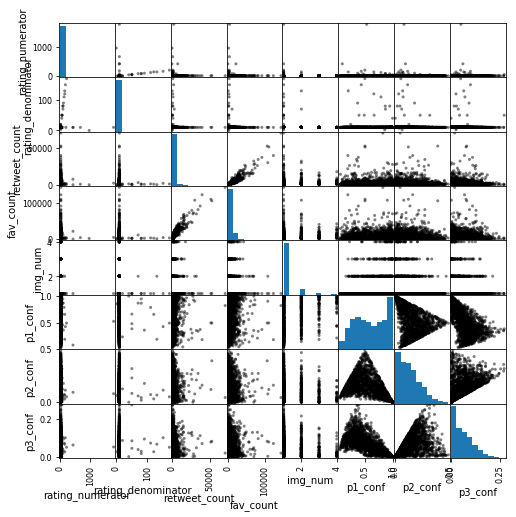

In [62]:
plt.figure(dpi = 75)
pd.plotting.scatter_matrix(archive_enhanced_clean, figsize = (8,8), color = 'k');

In [63]:
print(image_predictions_clean.shape)
image_predictions_clean

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Research Questions

#### Retweets
<li> What was the average number of retweets the WeRateDogs account got per tweet?</li>
<li> What was their most engaged content in terms of retweets?</li>


#### Favourites/Likes
<li> What was the average number of likes the WeRateDogs account got per tweet?</li>
<li> What was their most engaged content in terms of likes?</li>

#### Image Prediction
<li> How often was the first prediction actually a dog breed? </li>
<li> Which image predictions had the highest confidence level on average? </li>

### Research Question #1: Retweets

In [64]:
# What was the average number of retweets the WeRateDogs account got per tweet?
average_retweets = archive_enhanced_clean.retweet_count.mean()

average_retweets

2222.7134287032763

In [65]:
# What was their most engaged content in terms of retweets?
most_engaged_by_retweet = archive_enhanced_clean.query('retweet_count == retweet_count.max()')
most_engaged_by_retweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
855,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,none,doggo,70227.0,...,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


### Research Question #2: Likes

In [66]:
# What was the average number of likes the WeRateDogs account got per tweet?
average_likes = archive_enhanced_clean.fav_count.mean()

average_likes

7537.5089986155972

In [67]:
# What was their most engaged content in terms of likes?
most_engaged_by_like = archive_enhanced_clean.query('fav_count == fav_count.max()')
most_engaged_by_like

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
855,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,none,doggo,70227.0,...,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


### Research Question #3: Image Prediction

In [68]:
# How often was the first prediction a dog breed? 
freq = image_predictions_clean.p1_dog.sum() / len(image_predictions_clean)
freq

0.7383132530120482

In [69]:
# Which image predictions had the highest confidence level on average?
conf_levels = image_predictions_clean.groupby('p1').mean()['p1_conf'].sort_values(ascending = False)
conf_levels

p1
ping-pong_ball              0.999945
peacock                     0.999924
school_bus                  0.999833
bib                         0.998814
slug                        0.998075
zebra                       0.997673
fountain                    0.997509
china_cabinet               0.996031
flamingo                    0.992710
fiddler_crab                0.992069
cowboy_boot                 0.990253
electric_fan                0.984377
microwave                   0.981946
teapot                      0.981819
platypus                    0.974075
komondor                    0.972531
barbell                     0.971581
panpipe                     0.962572
sulphur-crested_cockatoo    0.960276
carton                      0.952613
clumber                     0.946718
otter                       0.945537
studio_couch                0.944692
mortarboard                 0.936882
envelope                    0.933016
scorpion                    0.927956
conch                       0.92562

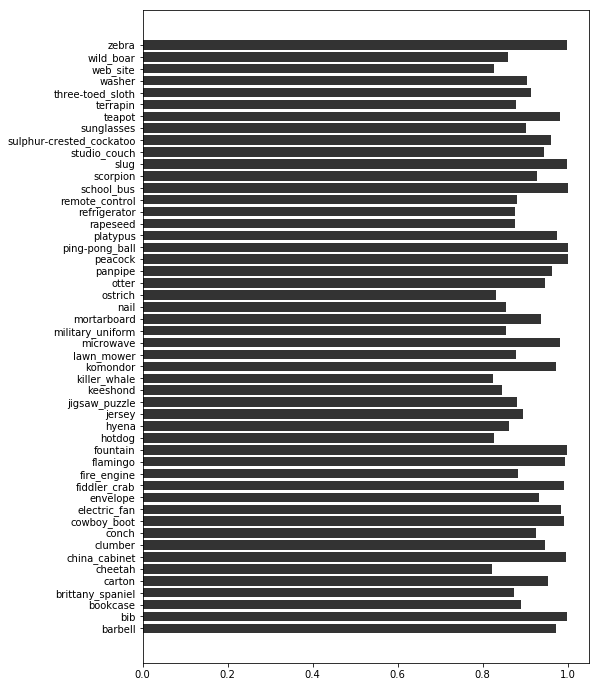

In [70]:
conf_levels = image_predictions_clean.groupby('p1').mean()['p1_conf'].sort_values(ascending = False)
plt.figure(figsize = (8, 12))
plt.barh(conf_levels.index[:50], conf_levels[:50], color = 'k', alpha = .8);

### Insights:
1. From analysis, it can be seen that the average retweets is 2222.7134287032763.

2. From analysis carried out in question #4, the model predicts the presence of a dog in the pictures 74.1% of the time.

3. Predictions with the highest average confidence level are not dog breeds, as seen in question #3 where I attempted to  understand which predictions were having the highest confidence levels in this dataset.